In [2]:
#!pip install statsmodels

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#load data
insurance_data = pd.read_csv('/content/drive/MyDrive/DATASETS/insurance_claims.csv')

insurance_data.head()

,age_of_driver,car_age,region,number_of_claims
0,30,7,Urban,0
1,33,10,Rural,2
2,39,11,Suburban,1
3,18,12,Urban,0
4,21,8,Urban,0


In [5]:
insurance_data.describe()

,age_of_driver,car_age,number_of_claims
count,1000.000000,1000.000000,1000.000000
mean,33.112000,6.673000,0.675000
std,9.253598,4.377583,0.822223
min,18.000000,0.000000,0.000000
25%,25.000000,3.000000,0.000000
50%,33.000000,6.000000,0.000000
75%,41.000000,11.000000,1.000000
max,49.000000,14.000000,5.000000


In [6]:
insurance_data.isnull().sum()

age_of_driver       0
car_age             0
region              0
number_of_claims    0
dtype: int64

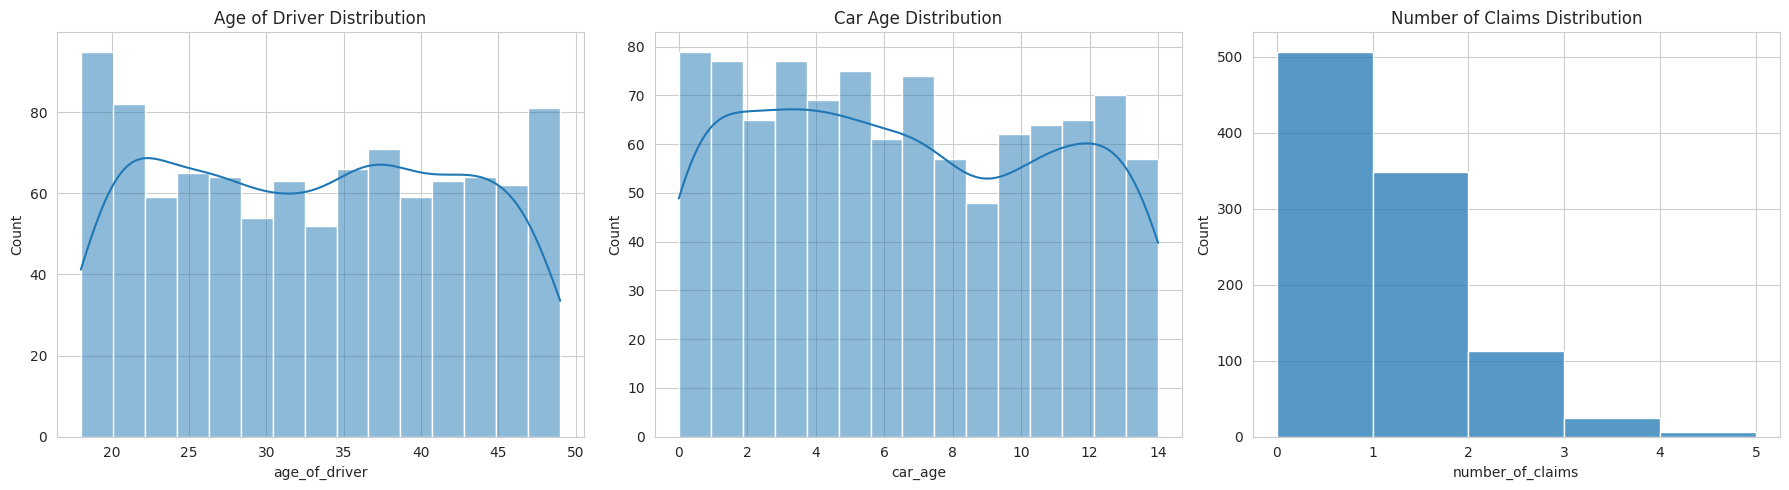

In [7]:
#set the aesthetic style of the plots
sns.set_style('whitegrid')

#plotting distributions of numerical variables
fig, ax = plt.subplots(1, 3, figsize=(18,5))

sns.histplot(insurance_data['age_of_driver'], kde=True, bins=15, ax=ax[0])
ax[0].set_title('Age of Driver Distribution')

sns.histplot(insurance_data['car_age'], kde=True, bins=15, ax=ax[1])
ax[1].set_title('Car Age Distribution')

sns.histplot(insurance_data['number_of_claims'], kde=False, bins=range(6), ax=ax[2])
ax[2].set_title('Number of Claims Distribution')

plt.tight_layout()
plt.show()

In [8]:
#preprocessing

from sklearn.model_selection import train_test_split

#OneHotEncoding for region variable
insurance_data_encoded = pd.get_dummies(insurance_data, columns=['region'], drop_first=True)

#splitting the data into training and testing sets
train ,test = train_test_split(insurance_data_encoded, test_size=0.2, random_state=42)

train.head()

,age_of_driver,car_age,number_of_claims,region_Suburban,region_Urban
29,26,13,1,0,0
535,42,9,2,1,0
695,44,8,1,0,0
557,41,3,1,1,0
836,31,12,0,0,1


In [10]:
#Building a Poisson GLM model

#preparing the data for modelling
x_train = train.drop('number_of_claims', axis=1)
y_train = train['number_of_claims']

#adding constant to the predictor variables
x_train_const = sm.add_constant(x_train)

#Building the Poisson GLM Model
poisson_glm = sm.GLM(y_train, x_train_const, family=sm.families.Poisson()).fit()

#display the model summary
poisson_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       number_of_claims   No. Observations:                  800
Model:                            GLM   Df Residuals:                      795
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -845.44
Date:                Wed, 20 Mar 2024   Deviance:                       829.41
Time:                        09:02:16   Pearson chi2:                     770.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.02749
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0906      0.181      0.502      0.616      -0.263       0.444
age_of_driver      -0.0205      0.005     -4.321      0.000      -0.030      -0.011
car_age             0.0152      0.010      1.539      0.124      -0.004       0.035
region_Suburban     0.0799      0.106      0.755      0.450      -0.127       0.287
region_Urban        0.0861      0.108      0.794      0.427      -0.126       0.298
===================================================================================
"""